# Objetivo

- Identificar grupos de productos que se comportan de manera similar.
- identificar grupos de productos similares, y que esos grupos serán súper útiles para evaluar el desempeño de nuestras diferentes campañas.
- ¿Cuántos grupos crees que deberíamos considerar? ¿5? ¿10? ¿20?
- Además, ¿crees que podríamos encontrar un enfoque "sólido" para identificar qué tan similares son las tiendas unas de otras?
- ¿También tendría sentido aquí hacer clústeres de tiendas?
No tiene sentido ya que son muy pocas


# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_sales = pd.read_csv('/content/drive/MyDrive/COMPARTIDO_DSMARKET/Base_datos/item_sales.csv')
df_prices = pd.read_csv('/content/drive/MyDrive/COMPARTIDO_DSMARKET/Base_datos/item_prices.csv')
df_calendar = pd.read_csv('/content/drive/MyDrive/COMPARTIDO_DSMARKET/Base_datos/daily_calendar_with_events.csv')

In [ ]:
# df_sales = pd.read_csv('C:/Users/aalei/Desktop/clustering/Data/item_sales.csv')
# df_prices = pd.read_csv('C:/Users/aalei/Desktop/clustering/Data/item_prices.csv')
# df_calendar = pd.read_csv('C:/Users/aalei/Desktop/clustering/Data/daily_calendar_with_events.csv')

# EDA tablas principales

## EDA sales table

In [ ]:
def report_df(df, verbose = True):
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    cantidad_filas_duplicadas = df.duplicated().sum()
    print()
    print("Cantidad total de filas duplicadas:", cantidad_filas_duplicadas)
    print(f"Tenemos un total de {total_nulos} nulos")

In [ ]:
report_df(df_sales.iloc[:,:10])

df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          30490 non-null  object
 1   item        30490 non-null  object
 2   category    30490 non-null  object
 3   department  30490 non-null  object
 4   store       30490 non-null  object
 5   store_code  30490 non-null  object
 6   region      30490 non-null  object
 7   d_1         30490 non-null  int64 
 8   d_2         30490 non-null  int64 
 9   d_3         30490 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.3+ MB
None

Cantidad total de filas duplicadas: 0
Tenemos un total de 0 nulos


id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

               store store_code    region  d_1  d_2  d_3  d_4  d_5  d_6  d_7  \
0  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
1  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
2  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
3  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
4  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   

   d_8  d_9  d_10  d_11  d_12  d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  \
0    0    0     0     0     0     0     0     0     0     0     0     0     0   
1    0    0     0     0     0     0     0     0     0     0     0     0     0   
2    0    0     0     0     0     0     0     0     0     0     0     0     0   
3    0    0     0     0     0     0     0     0     0     0     0     0     0   
4    0    0     0     0     0     0     0     0     0     0     0     0     0   

   d_21  d_22  d_23  d_24  d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_33  d_34  d_35  d_36  d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     2     0     0     0     2     0     1     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_45  d_46  d_47  d_48  d_49  d_50  d_51  d_52  d_53  d_54  d_55  d_56  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     2     0     1     0     0     1     1   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_57  d_58  d_59  d_60  d_61  d_62  d_63  d_64  d_65  d_66  d_67  d_68  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     1     0     2     3     1     0     0     0     0     0     1     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_69  d_70  d_71  d_72  d_73  d_74  d_75  d_76  d_77  d_78  d_79  d_80  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     1     0     0     1     0     0     1     2     3     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_81  d_82  d_83  d_84  d_85  d_86  d_87  d_88  d_89  d_90  d_91  d_92  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0   

## EDA calendar table

In [ ]:
report_df(df_calendar)

df_calendar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB
None

Cantidad total de filas duplicadas: 0
Tenemos un total de 1887 nulos


,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [ ]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['year'] = df_calendar['date'].dt.year
df_calendar['yearweek'] = df_calendar['date'].dt.strftime('%Y%W').astype(int)
df_calendar['yearmonth'] = df_calendar['date'].dt.strftime('%Y%m').astype(int)

print(df_calendar['yearweek'].min())
print(df_calendar['yearweek'].max())

201104
201616


In [ ]:
columnas_con_nulos = df_calendar.columns[df_calendar.isnull().any()].tolist()
print("Las columnas que tienen valores nulos son:", columnas_con_nulos)

Las columnas que tienen valores nulos son: ['event']


In [ ]:
df_calendar['event'].fillna('No event', inplace = True)

## EDA prices table

In [ ]:
report_df(df_prices)

df_prices.head(3).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB
None

Cantidad total de filas duplicadas: 212120
Tenemos un total de 243920 nulos


,0,1,2
item,ACCESORIES_1_001,ACCESORIES_1_001,ACCESORIES_1_001
category,ACCESORIES,ACCESORIES,ACCESORIES
store_code,NYC_1,NYC_1,NYC_1
yearweek,201328.0,201329.0,201330.0
sell_price,12.7414,12.7414,10.9858


**HIPOTESIS:** parece que todos los nulos se encuentran a partir de la misma fecha

In [ ]:
filas_con_nulos_en_yearweek = df_prices[df_prices['yearweek'].isnull()]

# Obtiene los valores de 'yearweek' de la fila anterior solo si no es nulo
valores_anteriores = []
for index in filas_con_nulos_en_yearweek.index:
    indice_anterior = index - 1
    if indice_anterior >= 0:
        valor_anterior = df_prices.loc[indice_anterior, 'yearweek']
        if not pd.isnull(valor_anterior):
            valores_anteriores.append(valor_anterior)

# Verifica si todos los valores son iguales
if len(set(valores_anteriores)) == 1:
    print("Todos los valores anteriores en 'yearweek' son iguales.")
else:
    print("Los valores anteriores en 'yearweek' son diferentes.")


Todos los valores anteriores en 'yearweek' son iguales.


In [ ]:
# Se confirma la hipótesis eliminamos esos nulos
df_calendar.dropna(subset=['yearweek'], inplace=True)

# Creación de variables




In [ ]:
len_objetivo = len(df_sales['item'].unique())

print('Necesitaremos un df con esta logitud:', len_objetivo)

Necesitaremos un df con esta logitud: 3049


## total_sales

In [ ]:
df_sales['total_sales'] = df_sales.iloc[:, 7:].sum(axis=1)

In [ ]:
df_clust = df_sales.groupby('item')['total_sales'].sum().reset_index()

print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,total_sales
0,ACCESORIES_1_001,4093
1,ACCESORIES_1_002,5059


## mean_sell_price, price_variation

In [ ]:
# Calcular la media y variación para cada 'item'
df_clust['mean_sell_price'] = df_prices.groupby('item')['sell_price'].mean().values
df_clust['price_variation'] = df_prices.groupby('item')['sell_price'].apply(lambda x: x.max() - x.min()).values

In [ ]:
print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,total_sales,mean_sell_price,price_variation
0,ACCESORIES_1_001,4093,11.036080,6.0914
1,ACCESORIES_1_002,5059,5.275835,2.6201


## total_sales_year

In [ ]:
unique_values_by_year = {}

# Crear una lista de todos los días que pertenecen a cada mes
for year in df_calendar['year'].unique():
    values_for_year = df_calendar[df_calendar['year'] == year]['d'].unique()
    unique_values_by_year[year] = values_for_year.tolist()



for clave, valores in unique_values_by_year.items():
    # Sumar las columnas y asignar el resultado a una nueva columna
    df_clust[f'total_sales_year_{clave}'] = df_sales.loc[:, valores].sum(axis=1)


print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,total_sales,mean_sell_price,price_variation,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015,total_sales_year_2016
0,ACCESORIES_1_001,4093,11.036080,6.0914,0,0,84,186,222,108
1,ACCESORIES_1_002,5059,5.275835,2.6201,58,91,85,117,122,20


In [ ]:
df_recuperacion_years = df_clust.copy()
df_recuperacion_years = df_recuperacion_years.drop(['total_sales', 'mean_sell_price', 'price_variation', 'total_sales_year_2016'], axis=1)
df_recuperacion_years.head()

,item,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015
0,ACCESORIES_1_001,0,0,84,186,222
1,ACCESORIES_1_002,58,91,85,117,122
2,ACCESORIES_1_003,0,0,0,60,182
3,ACCESORIES_1_004,425,420,582,862,771
4,ACCESORIES_1_005,269,310,383,344,420


## total_revenue

In [ ]:
df_clust['total_revenue'] = df_clust['total_sales'] * df_clust['mean_sell_price']

In [ ]:
print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,total_sales,mean_sell_price,price_variation,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015,total_sales_year_2016,total_revenue
0,ACCESORIES_1_001,4093,11.036080,6.0914,0,0,84,186,222,108,45170.677437
1,ACCESORIES_1_002,5059,5.275835,2.6201,58,91,85,117,122,20,26690.448141


## max_daily_sales

In [ ]:
df_sales.head(1)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_366,d_367,d_368,d_369,d_370,d_371,d_372,d_373,d_374,d_375,d_376,d_377,d_378,d_379,d_380,d_381,d_382,d_383,d_384,d_385,d_386,d_387,d_388,d_389,d_390,d_391,d_392,d_393,d_394,d_395,d_396,d_397,d_398,d_399,d_400,d_401,d_402,d_403,d_404,d_405,d_406,d_407,d_408,d_409,d_410,d_411,d_412,d_413,d_414,d_415,d_416,d_417,d_418,d_419,d_420,d_421,d_422,d_423,d_424,d_425,d_426,d_427,d_428,d_429,d_430,d_431,d_432,d_433,d_434,d_435,d_436,d_437,d_438,d_439,d_440,d_441,d_442,d_443,d_444,d_445,d_446,d_447,d_448,d_449,d_450,d_451,d_452,d_453,d_454,d_455,d_456,d_457,d_458,d_459,d_460,d_461,d_462,d_463,d_464,d_465,d_466,d_467,d_468,d_469,d_470,d_471,d_472,d_473,d_474,d_475,d_476,d_477,d_478,d_479,d_480,d_481,d_482,d_483,d_484,d_485,d_486,d_487,d_488,d_489,d_490,d_491,d_492,d_493,d_494,d_495,d_496,d_497,d_498,d_499,d_500,d_501,d_502,d_503,d_504,d_505,d_506,d_507,d_508,d_509,d_510,d_511,d_512,d_513,d_514,d_515,d_516,d_517,d_518,d_519,d_520,d_521,d_522,d_523,d_524,d_525,d_526,d_527,d_528,d_529,d_530,d_531,d_532,d_533,d_534,d_535,d_536,d_537,d_538,d_539,d_540,d_541,d_542,d_543,d_544,d_545,d_546,d_547,d_548,d_549,d_550,d_551,d_552,d_553,d_554,d_555,d_556,d_557,d_558,d_559,d_560,d_561,d_562,d_563,d_564,d_565,d_566,d_567,d_568,d_569,d_570,d_571,d_572,d_573,d_574,d_575,d_576,d_577,d_578,d_579,d_580,d_581,d_582,d_583,d_584,d_585,d_586,d_587,d_588,d_589,d_590,d_591,d_592,d_593,d_594,d_595,d_596,d_597,d_598,d_599,d_600,d_601,d_602,d_603,d_604,d_605,d_606,d_607,d_608,d_609,d_610,d_611,d_612,d_613,d_614,d_615,d_616,d_617,d_618,d_619,d_620,d_621,d_622,d_623,d_624,d_625,d_626,d_627,d_628,d_629,d_630,d_631,d_632,d_633,d_634,d_635,d_636,d_637,d_638,d_639,d_640,d_641,d_642,d_643,d_644,d_645,d_646,d_647,d_648,d_649,d_650,d_651,d_652,d_653,d_654,d_655,d_656,d_657,d_658,d_659,d_660,d_661,d_662,d_663,d_664,d_665,d_666,d_667,d_668,d_669,d_670,d_671,d_672,d_673,d_674,d_675,d_676

In [ ]:
df_sales2 = df_sales.groupby('item').sum()

In [ ]:
df_sales2.iloc[:,6:-1].head(1)

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_366,d_367,d_368,d_369,d_370,d_371,d_372,d_373,d_374,d_375,d_376,d_377,d_378,d_379,d_380,d_381,d_382,d_383,d_384,d_385,d_386,d_387,d_388,d_389,d_390,d_391,d_392,d_393,d_394,d_395,d_396,d_397,d_398,d_399,d_400,d_401,d_402,d_403,d_404,d_405,d_406,d_407,d_408,d_409,d_410,d_411,d_412,d_413,d_414,d_415,d_416,d_417,d_418,d_419,d_420,d_421,d_422,d_423,d_424,d_425,d_426,d_427,d_428,d_429,d_430,d_431,d_432,d_433,d_434,d_435,d_436,d_437,d_438,d_439,d_440,d_441,d_442,d_443,d_444,d_445,d_446,d_447,d_448,d_449,d_450,d_451,d_452,d_453,d_454,d_455,d_456,d_457,d_458,d_459,d_460,d_461,d_462,d_463,d_464,d_465,d_466,d_467,d_468,d_469,d_470,d_471,d_472,d_473,d_474,d_475,d_476,d_477,d_478,d_479,d_480,d_481,d_482,d_483,d_484,d_485,d_486,d_487,d_488,d_489,d_490,d_491,d_492,d_493,d_494,d_495,d_496,d_497,d_498,d_499,d_500,d_501,d_502,d_503,d_504,d_505,d_506,d_507,d_508,d_509,d_510,d_511,d_512,d_513,d_514,d_515,d_516,d_517,d_518,d_519,d_520,d_521,d_522,d_523,d_524,d_525,d_526,d_527,d_528,d_529,d_530,d_531,d_532,d_533,d_534,d_535,d_536,d_537,d_538,d_539,d_540,d_541,d_542,d_543,d_544,d_545,d_546,d_547,d_548,d_549,d_550,d_551,d_552,d_553,d_554,d_555,d_556,d_557,d_558,d_559,d_560,d_561,d_562,d_563,d_564,d_565,d_566,d_567,d_568,d_569,d_570,d_571,d_572,d_573,d_574,d_575,d_576,d_577,d_578,d_579,d_580,d_581,d_582,d_583,d_584,d_585,d_586,d_587,d_588,d_589,d_590,d_591,d_592,d_593,d_594,d_595,d_596,d_597,d_598,d_599,d_600,d_601,d_602,d_603,d_604,d_605,d_606,d_607,d_608,d_609,d_610,d_611,d_612,d_613,d_614,d_615,d_616,d_617,d_618,d_619,d_620,d_621,d_622,d_623,d_624,d_625,d_626,d_627,d_628,d_629,d_630,d_631,d_632,d_633,d_634,d_635,d_636,d_637,d_638,d_639,d_640,d_641,d_642,d_643,d_644,d_645,d_646,d_647,d_648,d_649,d_650,d_651,d_652,d_653,d_654,d_655,d_656,d_657,d_658,d_659,d_660,d_661,d_662,d_663,d_664,d_665,d_666,d_667,d_668,d_669,d_670,d_671,d_672,d_673,d_674,d_675,d_676,d_677,d_678,d_679,d_680,d_681,d_682,d_683,d_684,d_6

In [ ]:
df_clust['max_daily_sales'] = df_sales2.iloc[:,6:-1].max(axis=1).values

In [ ]:
print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,total_sales,mean_sell_price,price_variation,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015,total_sales_year_2016,total_revenue,max_daily_sales
0,ACCESORIES_1_001,4093,11.036080,6.0914,0,0,84,186,222,108,45170.677437,15
1,ACCESORIES_1_002,5059,5.275835,2.6201,58,91,85,117,122,20,26690.448141,24


## months_with_sales

In [ ]:
unique_values_by_month = {}

# Crear una lista de todos los días que pertenecen a cada mes
for month in df_calendar['yearmonth'].unique():
    values_for_month = df_calendar[df_calendar['yearmonth'] == month]['d'].unique()
    unique_values_by_month[month] = values_for_month.tolist()


for clave, valores in unique_values_by_month.items():
    # Sumar las columnas y asignar el resultado a una nueva columna
    df_clust[clave] = df_sales.loc[:, valores].sum(axis=1)


print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,total_sales,mean_sell_price,price_variation,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015,total_sales_year_2016,total_revenue,max_daily_sales,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,201201,201202,201203,201204,201205,201206,201207,201208,201209,201210,201211,201212,201301,201302,201303,201304,201305,201306,201307,201308,201309,201310,201311,201312,201401,201402,201403,201404,201405,201406,201407,201408,201409,201410,201411,201412,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604
0,ACCESORIES_1_001,4093,11.036080,6.0914,0,0,84,186,222,108,45170.677437,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,14,15,21,20,12,13,11,11,9,18,15,13,22,17,19,26,20,20,24,19,4,14,19,25,20,18,17,22,24,29,29,26
1,ACCESORIES_1_002,5059,5.275835,2.6201,58,91,85,117,122,20,26690.448141,24,0,0,0,0,0,3,5,10,7,8,4,21,7,6,1,5,6,5,4,4,8,11,6,28,8,6,10,4,8,8,10,10,3,5,3,10,1,3,4,7,12,14,13,12,4,13,13,21,4,3,4,3,10,7,15,18,9,10,12,27,4,5,10,1


In [ ]:
print(df_calendar['yearmonth'].min())
print(df_calendar['yearmonth'].max())

201101
201604


In [ ]:
df_clust.iloc[:,12:].head(1)

,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,201201,201202,201203,201204,201205,201206,201207,201208,201209,201210,201211,201212,201301,201302,201303,201304,201305,201306,201307,201308,201309,201310,201311,201312,201401,201402,201403,201404,201405,201406,201407,201408,201409,201410,201411,201412,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,14,15,21,20,12,13,11,11,9,18,15,13,22,17,19,26,20,20,24,19,4,14,19,25,20,18,17,22,24,29,29,26


In [ ]:
# Números de meses con ventas
def contar_meses_con_ventas(df):
            return sum(1 for value in df if value != 0)

df_clust['months_with_sales'] = df_clust.iloc[:,12:].apply(contar_meses_con_ventas, axis=1)

In [ ]:
print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,total_sales,mean_sell_price,price_variation,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015,total_sales_year_2016,total_revenue,max_daily_sales,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,201201,201202,201203,201204,201205,201206,201207,201208,201209,201210,201211,201212,201301,201302,201303,201304,201305,201306,201307,201308,201309,201310,201311,201312,201401,201402,201403,201404,201405,201406,201407,201408,201409,201410,201411,201412,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604,months_with_sales
0,ACCESORIES_1_001,4093,11.036080,6.0914,0,0,84,186,222,108,45170.677437,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,14,15,21,20,12,13,11,11,9,18,15,13,22,17,19,26,20,20,24,19,4,14,19,25,20,18,17,22,24,29,29,26,34
1,ACCESORIES_1_002,5059,5.275835,2.6201,58,91,85,117,122,20,26690.448141,24,0,0,0,0,0,3,5,10,7,8,4,21,7,6,1,5,6,5,4,4,8,11,6,28,8,6,10,4,8,8,10,10,3,5,3,10,1,3,4,7,12,14,13,12,4,13,13,21,4,3,4,3,10,7,15,18,9,10,12,27,4,5,10,1,59


## month_first_sales_date,	days_since_last_sale

In [ ]:
df_clust.iloc[:,12:-1].head(1)

,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,201201,201202,201203,201204,201205,201206,201207,201208,201209,201210,201211,201212,201301,201302,201303,201304,201305,201306,201307,201308,201309,201310,201311,201312,201401,201402,201403,201404,201405,201406,201407,201408,201409,201410,201411,201412,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,14,15,21,20,12,13,11,11,9,18,15,13,22,17,19,26,20,20,24,19,4,14,19,25,20,18,17,22,24,29,29,26


In [ ]:
# Convierte las columnas de yearmonth a formato de fecha
date_columns = df_clust.columns[12:-1]
date_columns_rename = date_columns.to_series().apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

# Renombrar columnas
rename_dict = dict(zip(date_columns, date_columns_rename))
df_clust.rename(columns=rename_dict, inplace=True)

In [ ]:
# Función para encontrar el último nombre de columna con valor mayor a 0
def last_sales_date(row):
    last_date_column = None
    for col in date_columns_rename:
        if row[col] > 0:
            last_date_column = col
    return last_date_column

# Función para encontrar el primer nombre de columna con valor mayor a 0
def first_sales_date(row):
    first_date_column = None
    for col in date_columns_rename:
        if row[col] > 0:
            first_date_column = col
            break  # Detenemos el bucle una vez que se encuentra el primer valor mayor a 0
    return first_date_column

# Aplicar la función a lo largo de las filas para encontrar nombre de columna con valor mayor a 0
df_clust['last_sales_date'] = df_clust.apply(last_sales_date, axis=1)
df_clust['month_first_sales_date'] = df_clust.apply(first_sales_date, axis=1)

In [ ]:
# Calcula la diferencia en meses entre la fecha actual y la fecha de la última venta
today = datetime(2016, 4, 1)

# Calcula la diferencia en meses entre la fecha actual y la fecha de la última venta
df_clust['days_since_last_sale'] = (today - df_clust['last_sales_date'])
df_clust.drop(columns=['last_sales_date'], inplace=True)

df_clust.head()

,item,total_sales,mean_sell_price,price_variation,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015,total_sales_year_2016,total_revenue,max_daily_sales,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-05-01 00:00:00,2012-06-01 00:00:00,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,months_with_sales,month_first_sales_date,days_since_last_sale
0,ACCESORIES_1_001,4093,11.036080,6.0914,0,0,84,186,222,108,45170.677437,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,14,15,21,20,12,13,11,11,9,18,15,13,22,17,19,26,20,20,24,19,4,14,19,25,20,18,17,22,24,29,29,26,34,2013-07-01,0 days
1,ACCESORIES_1_002,5059,5.275835,2.6201,58,91,85,117,122,20,26690.448141,24,0,0,0,0,0,3,5,10,7,8,4,21,7,6,1,5,6,5,4,4,8,11,6,28,8,6,10,4,8,8,10,10,3,5,3,10,1,3,4,7,12,14,13,12,4,13,13,21,4,3,4,3,10,7,15,18,9,10,12,27,4,5,10,1,59,2011-06-01,0 days
2,ACCESORIES_1_003,1435,3.944519,6.6899,0,0,0,60,182,46,5660.384828,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,12,8,8,4,4,2,9,0,0,2,10,10,10,4,12,10,10,12,20,16,23,45,6,9,15,16,25,2014-02-01,0 days
3,ACCESORIES_1_004,39175,5.988577,1.1571,425,420,582,862,771,228,234602.510908,61,0,0,17,23,34,28,60,55,53,55,47,53,48,39,51,31,32,30,27,42,59,43,11,7,10,37,58,54,44,37,26,52,55,65,63,81,61,67,75,65,80,76,76,79,61,50,96,76,76,73,66,75,85,59,64,57,51,64,52,49,64,60,53,51,62,2011-03-01,0 days
4,ACCESORIES_1_005,14621,3.830302,2.1014,269,310,383,344,420,123,56002.843276,35,0,0,0,0,31,31,5,36,67,26,33,40,21,21,1,0,27,41,21,33,18,37,44,46,43,32,35,27,26,24,37,34,43,29,23,30,24,25,22,24,26,25,25,25,20,43,40,45,28,34,38,36,20,27,31,44,37,43,37,45,22,33,39,29,59,2011-05-01,0 days


In [ ]:
df_clust = df_clust.drop(df_clust.columns[12:-3], axis=1)

In [ ]:
print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,total_sales,mean_sell_price,price_variation,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015,total_sales_year_2016,total_revenue,max_daily_sales,months_with_sales,month_first_sales_date,days_since_last_sale
0,ACCESORIES_1_001,4093,11.036080,6.0914,0,0,84,186,222,108,45170.677437,15,34,2013-07-01,0 days
1,ACCESORIES_1_002,5059,5.275835,2.6201,58,91,85,117,122,20,26690.448141,24,59,2011-06-01,0 days


## mean_sales_month

In [ ]:
df_clust['mean_sales_month'] = df_clust['total_sales']  / df_clust['months_with_sales']

# Preprocessing df_clust

**Pasar a numerico**

In [ ]:
# Obtener las columnas que no son numéricas
non_numeric_columns = df_clust.select_dtypes(exclude='number').columns.tolist()
print(non_numeric_columns)

['item', 'month_first_sales_date']


In [ ]:
df_clust['month_first_sales_date'] = df_clust['month_first_sales_date'].dt.strftime('%Y%m').astype(int)

In [ ]:
# Convierte los objetos Timedelta en días y luego a tipo entero
df_clust['days_since_last_sale'] = df_clust['days_since_last_sale'].dt.days.astype(int)

**Nulos**

In [ ]:
nulos = df_clust.isnull().sum().sum()
print(f'Tenemos {nulos} nulos en df_clust')

Tenemos 0 nulos en df_clust


In [ ]:
corr = df_clust.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,total_sales,mean_sell_price,price_variation,total_sales_year_2011,total_sales_year_2012,total_sales_year_2013,total_sales_year_2014,total_sales_year_2015,total_sales_year_2016,total_revenue,max_daily_sales,months_with_sales,month_first_sales_date,days_since_last_sale,mean_sales_month
total_sales,1.000000,-0.218542,-0.122746,0.805988,0.874111,0.886985,0.878685,0.842622,0.790996,0.731301,0.856737,0.229163,-0.185579,-0.023145,0.962870
mean_sell_price,-0.218542,1.000000,0.484748,-0.173818,-0.172575,-0.189698,-0.206643,-0.200922,-0.198243,0.143590,-0.234000,-0.068374,0.043290,0.003635,-0.225953
price_variation,-0.122746,0.484748,1.000000,-0.088228,-0.089190,-0.106557,-0.119501,-0.127391,-0.128697,0.046863,-0.124240,0.063363,-0.096406,-0.009256,-0.139456
total_sales_year_2011,0.805988,-0.173818,-0.088228,1.000000,0.827804,0.725545,0.722863,0.699731,0.641533,0.590338,0.649776,0.308191,-0.276176,-0.023638,0.722901
total_sales_year_2012,0.874111,-0.172575,-0.089190,0.827804,1.000000,0.908029,0.837834,0.782449,0.735835,0.666549,0.793278,0.263184,-0.233296,-0.001510,0.816453
total_sales_year_2013,0.886985,-0.189698,-0.106557,0.725545,0.908029,1.000000,0.915524,0.845343,0.801633,0.663613,0.822330,0.224097,-0.182012,-0.022555,0.856231
total_sales_year_2014,0.878685,-0.206643,-0.119501,0.722863,0.837834,0.915524,1.000000,0.921784,0.857645,0.674751,0.769483,0.181367,-0.122317,-0.012260,0.867245
total_sales_year_2015,0.842622,-0.200922,-0.127391,0.699731,0.782449,0.845343,0.921784,1.000000,0.928909,0.687051,0.713612,0.145326,-0.083627,-0.037504,0.842642
total_sales_year_2016,0.790996,-0.198243,-0.128697,0.641533,0.735835,0.801633,0.857645,0.928909,1.000000,0.647345,0.675786,0.123355,-0.074469,-0.081228,0.805618
total_revenue,0.731301,0.143590,0.046863,0.590338,0.666549,0.663613,0.674751,0.687051,0.647345,1.000000,0.595942,0.243060,-0.216737,-0.011989,0.725022


In [ ]:
columns_to_delete = ['total_sales_year_2011', 'total_sales_year_2012', 'total_sales_year_2013',
                     'total_sales_year_2014', 'total_sales_year_2015', 'total_sales']
df_clust.drop(columns=columns_to_delete, inplace=True)


In [ ]:
df_clust.set_index('item', inplace=True)

# Elbow curve

In [ ]:
print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_clust))
df_clust.head(2)

Longitud deseada: 3049
Longitud: 3049


,mean_sell_price,price_variation,total_sales_year_2016,total_revenue,max_daily_sales,months_with_sales,month_first_sales_date,days_since_last_sale,mean_sales_month
item,,,,,,,,,
ACCESORIES_1_001,11.036080,6.0914,108,45170.677437,15,34,201307,0,120.382353
ACCESORIES_1_002,5.275835,2.6201,20,26690.448141,24,59,201106,0,85.745763


In [ ]:
df_final = df_clust.copy()

In [ ]:
pipe = Pipeline(steps=[
    ("Imputer", KNNImputer()),
    ("RobustScaler", RobustScaler(quantile_range=(0, 99.0))),
    ("Clustering", KMeans(n_clusters=5, random_state=42,  n_init=10))
])

In [ ]:
df_scaled_transformed = pipe.fit_transform(df_final)

In [ ]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k,  n_init=10)
    clustering_model.fit(df_final)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


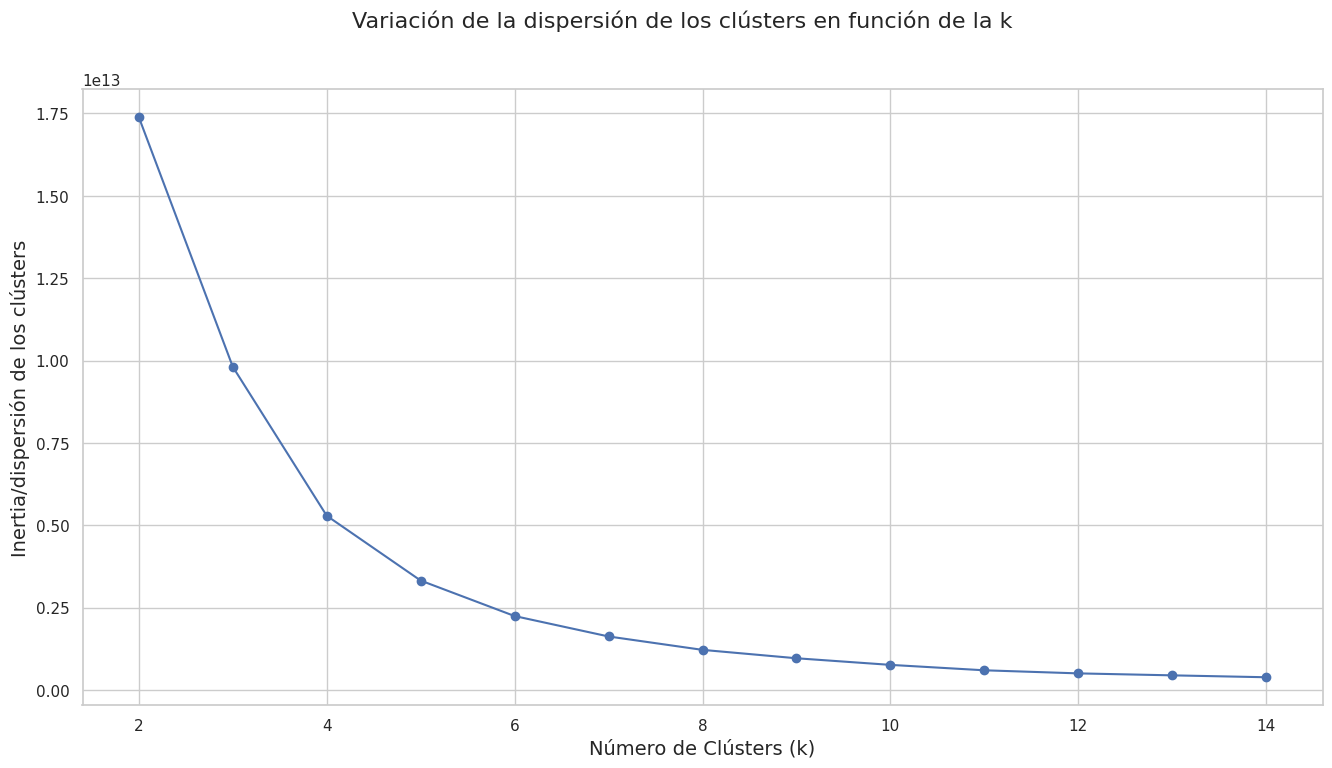

In [ ]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

# Graficar la dispersión de los clústers
ax.plot(x_values, y_values, label="Inertia/dispersión de los clústers", marker='o', linestyle='-')

# Añadir etiquetas al gráfico
ax.set_xlabel('Número de Clústers (k)', fontsize=14)
ax.set_ylabel('Inertia/dispersión de los clústers', fontsize=14)
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize=16)

plt.show()

# Segmentación de los productos con la "k adecuada"

In [ ]:
pipe = Pipeline(steps = [
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 4, random_state = 175, n_init=10))
])

In [ ]:
pipe.fit(df_final)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering',
                 KMeans(n_clusters=4, n_init=10, random_state=175))])

In [ ]:
labels = pipe.predict(df_final)
df_final["cluster"] = labels

# Ficha de productos

In [ ]:
df_final.groupby("cluster").size()

cluster
0    2030
1     132
2     861
3      26
dtype: int64

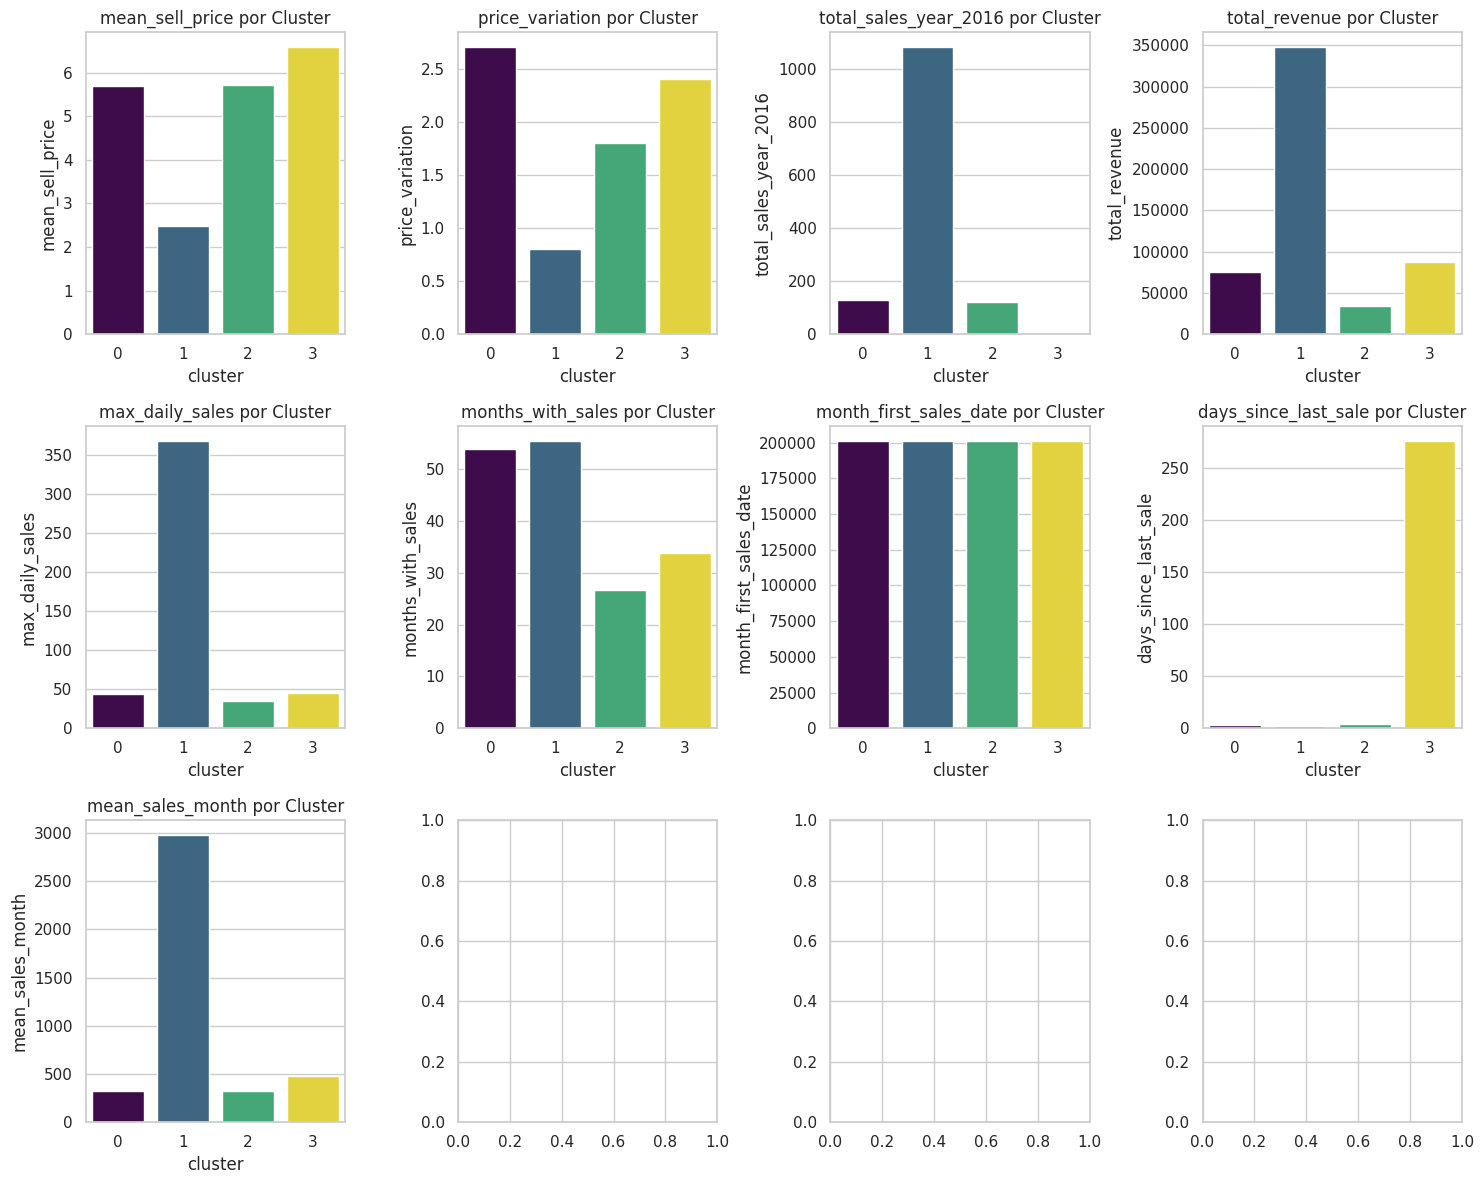

In [ ]:
sns.set(style="whitegrid")

# Obtén la lista de columnas excluyendo la columna 'cluster'
columns_to_plot = [col for col in df_final.columns if col != 'cluster']

# Calcula el número total de filas y columnas para los subgráficos
total_plots = len(columns_to_plot)
rows = math.ceil(total_plots / 4)
cols = 4

# Configura los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

# Itera sobre las columnas del DataFrame y crea gráficos de barras para cada columna
for i, column in enumerate(columns_to_plot):
    row_idx = i // cols
    col_idx = i % cols

    sns.barplot(x='cluster', y=column, data=df_final, hue='cluster', errorbar=None, palette='viridis', ax=axes[row_idx, col_idx], legend=False)
    axes[row_idx, col_idx].set_title(f'{column} por Cluster')

# Ajusta el diseño y muestra los gráficos
plt.tight_layout()
plt.show()

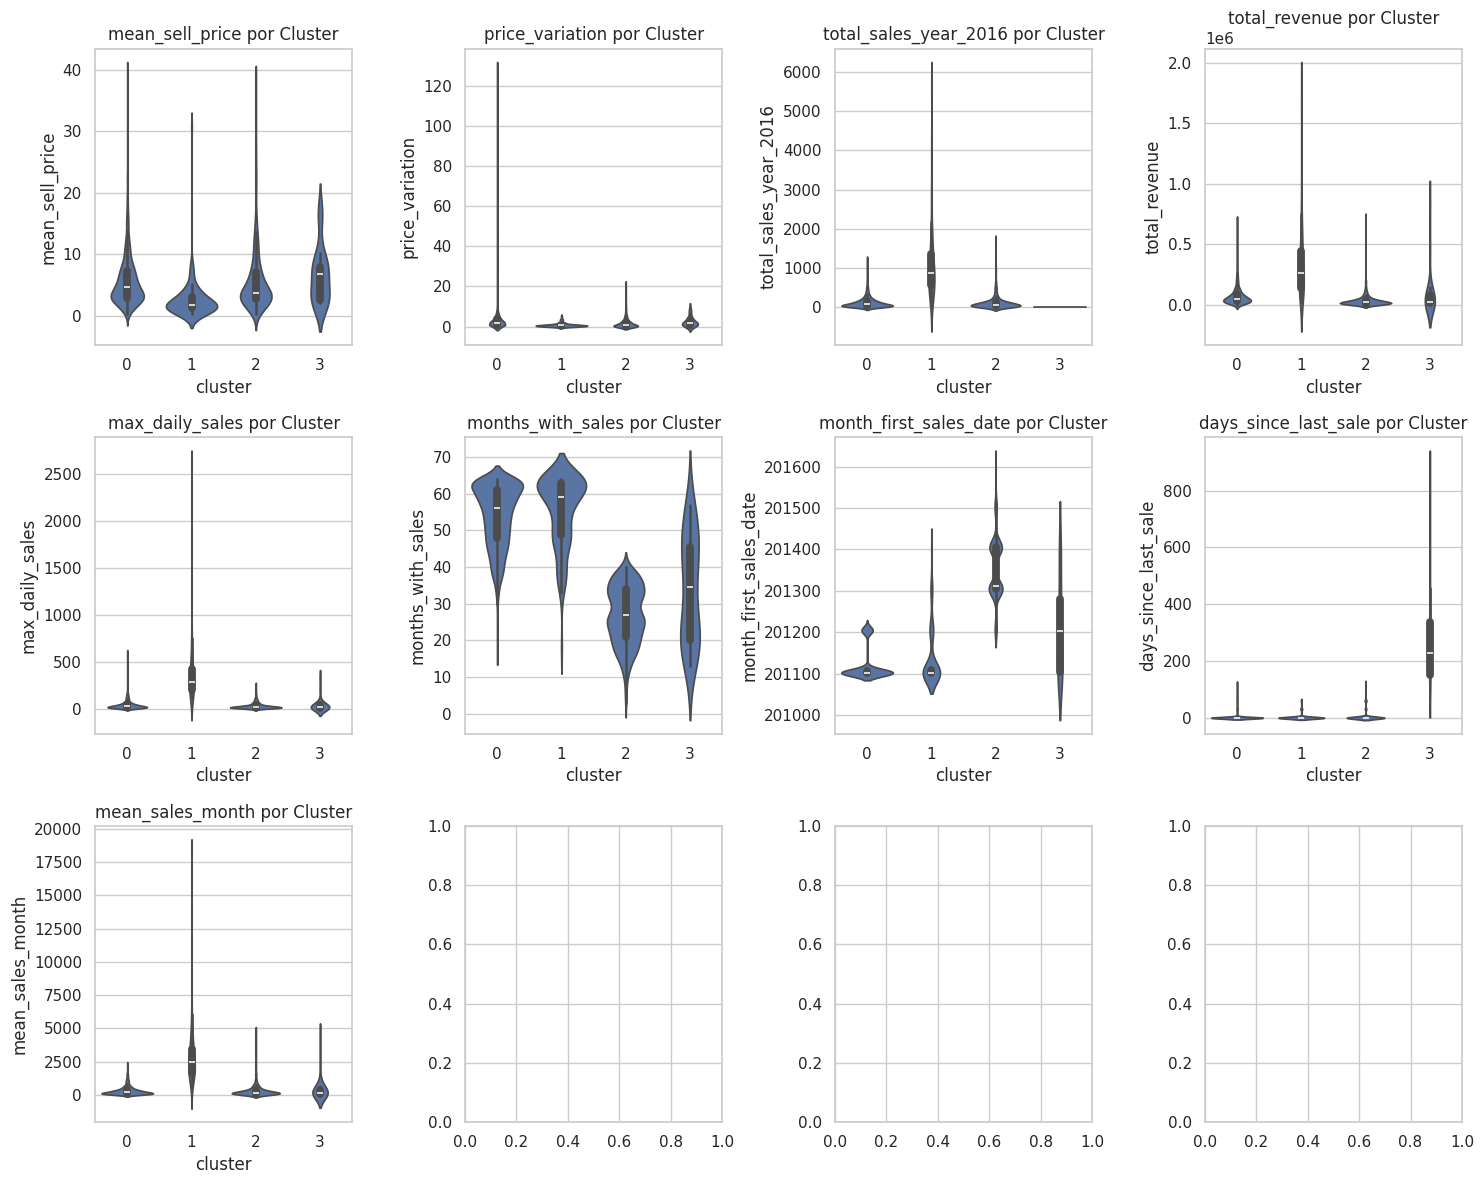

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Obtén la lista de columnas excluyendo la columna 'cluster'
columns_to_plot = [col for col in df_final.columns if col != 'cluster']

# Calcula el número total de filas y columnas para los subgráficos
total_plots = len(columns_to_plot)
rows = math.ceil(total_plots / 4)
cols = 4

# Configura los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

# Itera sobre las columnas del DataFrame y crea gráficos de violín para cada columna
for i, column in enumerate(columns_to_plot):
    row_idx = i // cols
    col_idx = i % cols

    sns.violinplot(x='cluster', y=column, data=df_final, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'{column} por Cluster')

# Ajusta el diseño y muestra los gráficos
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Crear una lista de columnas excluyendo 'cluster'
lista = [col for col in df_final.columns if col != 'cluster']

# Lista para almacenar los DataFrames de resumen
resumen_data_list = []

for col in lista:
    resumen_data = df_final[["cluster", col]].groupby("cluster").describe().T[1:]
    resumen_data_list.append(resumen_data)

# Concatenar todos los DataFrames de resumen en uno solo
ficha_df = pd.concat(resumen_data_list)

In [ ]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

# Guardar

In [ ]:
# Crear un diccionario de mapeo para los nuevos nombres
nuevos_nombres = {0: 'Items constantes', 1: 'Gastos hormiga', 2: 'Items nuevos', 3: 'Items cíclicos'}

# Renombrar los valores en la columna 'cluster' utilizando el diccionario de mapeo
df_final['cluster'] = df_final['cluster'].replace(nuevos_nombres)

In [ ]:
df_final.reset_index(inplace=True)

In [ ]:
df_powerbi = df_final.merge(df_recuperacion_years, on='item', how='left')

In [ ]:
# Renombramos las columnas
nuevos_nombres = {
    'total_sales_year_2011': '2011',
    'total_sales_year_2012': '2012',
    'total_sales_year_2013': '2013',
    'total_sales_year_2014': '2014',
    'total_sales_year_2015': '2015',
    'total_sales_year_2016': '2016',
}

df_powerbi = df_powerbi.rename(columns=nuevos_nombres)

In [ ]:
df_powerbi['month_first_sales_date'] = pd.to_datetime(df_powerbi['month_first_sales_date'], format='%Y%m')

In [ ]:
print('Longitud deseada:', len_objetivo)
print('Longitud:', len(df_powerbi))
df_powerbi.head(2)

Longitud deseada: 3049
Longitud: 3049


,item,mean_sell_price,price_variation,2016,total_revenue,max_daily_sales,months_with_sales,month_first_sales_date,days_since_last_sale,mean_sales_month,cluster,2011,2012,2013,2014,2015
0,ACCESORIES_1_001,11.036080,6.0914,108,45170.677437,15,34,2013-07-01,0,120.382353,Items nuevos,0,0,84,186,222
1,ACCESORIES_1_002,5.275835,2.6201,20,26690.448141,24,59,2011-06-01,0,85.745763,Items constantes,58,91,85,117,122


In [ ]:
# Guardar el DataFrame como un archivo Excel
df_powerbi.to_excel('/content/drive/MyDrive/COMPARTIDO_DSMARKET/1. Visualizacion/PowerBi/DF_CLUSTERING.xlsx', index=False)